

### Things we'll cover today



 **How to go about doing ML (with scikit learn)**
  - ML as a single pipeline
    - Most common data preprocessing steps
      - train-test split
      - vectorization of textual features (only for textual features)
      - Stop words
      - TF-IDF (only for textual features)
      - normalization
      - Stemming
      - Lemmatization
      
    - Training
      - fit 
      - predict
    - Evaluation
      - metrics : measure accuracy - precision / recall / f-score
      - Cross validation
      - Grid Search


1) **What is scikit-learn and why should I care about it**

- Scikit-learn is a python-based free ML library that provides well-implemented off-the-shelf implementations for almost all ML operations.
- Implementing ML from scratch that is scalable, efficient, and error-free is really very very hard.



2.1) **ML as a single pipeline**
- Almost all *scalable* ML models follows the style of development in a pipeline. It eases the pain of thinking through the complex ML processes.
- Keep this pipeline in mind while developing any ML model.

![alt text](http://cs.mcgill.ca/~sthaku3/other_media/COMP551_tutorial_2/Steps.png)


- P.S. :: Closed-form solution seeking ML don't follow this suit.

*** Most common data-proprocessing steps***




*** Vectorization of textual features (applicable only for textual features)***

A very simple approach to represent textual features such as documents or sentences as numerical value is to use each word as an atomic type and as a basis for a vector space. For example imagine a world where there exist only 3 words: “Apple”, “Orange”, and “Banana” and every sentence or document is made of them. They become the basis of a 3 dimensional vector space:

```
Apple  ==>> [1,0,0]
Banana ==>> [0,1,0]
Orange ==>> [0,0,1]
```

This representation is called **one_hot** as it is always a vector of zeros with 1 on the position of the word.

Then a “sentence” or a “document” is simply the linear combination of these vectors where the number of the counts of appearance of the words is the coefficient along that dimension. For example:

```
d3 = "Apple Orange Orange Apple" ==>> [2,0,2]
d4 = "Apple Banana Apple Banana" ==>> [2,2,0]
d1 = "Banana Apple Banana Banana Banana Apple" ==>> [2,4,0]
d2 = "Banana Orange Banana Banana Orange Banana" ==>> [0,4,2]
d5 = "Banana Apple Banana Banana Orange Banana" ==>> [1,4,1]
```

Since, our toy dataset also has textual features, we'll have to vectorize them. 

In [187]:
train_corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
     'Is this the first document?',]
test_corpus = ['This is the fourth document.']

In [188]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [189]:
vectors_train = vectorizer.fit_transform(train_corpus)


In [190]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [191]:
train_corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
     'Is this the first document?',]

print(vectors_train.todense())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [192]:
a = vectors_train
b = vectors_train
print(a+b)

  (0, 1)	2
  (0, 2)	2
  (0, 6)	2
  (0, 3)	2
  (0, 8)	2
  (1, 5)	2
  (1, 1)	4
  (1, 6)	2
  (1, 3)	2
  (1, 8)	2
  (2, 4)	2
  (2, 7)	2
  (2, 0)	2
  (2, 6)	2
  (2, 3)	2
  (2, 8)	2
  (3, 1)	2
  (3, 2)	2
  (3, 6)	2
  (3, 3)	2
  (3, 8)	2


In [193]:
 print(vectors_train)

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	2
  (1, 5)	1
  (2, 8)	1
  (2, 3)	1
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


In [194]:
# test mode
# and we do the same for test data. remember to use the same vectorizer, only transform (why?)
test_corpus = ['This is the fourth document.']
# ['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
vectors_test = vectorizer.transform(test_corpus)

print(vectors_test.todense())

[[0 1 0 1 0 0 1 0 1]]


### Stop words

In a large text corpus, some words are quite common (e.g. “the”, “a”, “is” in English). These words don't always convery meaningful information. However, if we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.

In [195]:
from sklearn.feature_extraction import text 

my_stop_words = text.ENGLISH_STOP_WORDS
vectorizer = CountVectorizer(stop_words = my_stop_words)
print(vectorizer)
vectors_train = vectorizer.fit_transform(train_corpus)
print(vectorizer.get_feature_names())

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=frozenset({'a', 'about', 'above', 'across', 'after',
                                      'afterwards', 'again', 'against', 'all',
                                      'almost', 'alone', 'along', 'already',
                                      'also', 'although', 'always', 'am',
                                      'among', 'amongst', 'amoungst', 'amount',
                                      'an', 'and', 'another', 'any', 'anyhow',
                                      'anyone', 'anything', 'anyway',
                                      'anywhere', ...}),
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
['docu

**1) Tf–idf term weighting(only for textual features)**



In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.''.

tf means term-frequency while tf–idf means term-frequency times inverse document-frequency:

$$\text{tf-idf} = \text{tf}(t,d)\  \text{X} \ \text{idf}(t)$$ 
  where :
- $t$ =  term/token/word 
 
- $d$ = document or a paragraph

- The $\text{tf}(t,d)$ is the number of times a token $t$ appears in a document $d$

- The idf is calculted as using the following formula:
  $$log\frac{n_{d}}{1+ \text{df}(d,t)}$$
  - where
   - $n_{d}$ is the total number of documents
   - $\text{df}(d,t)$ is the number of documents $d$ that contain term $t$ 

In [196]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer()
vectors_train_idf = tf_idf_vectorizer.fit_transform(train_corpus)

print(vectors_train_idf.shape)
print(vectors_train_idf.toarray())

(4, 9)
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


**2) Normalization**:

While not mandatory, normalization usually improves the performance of the learner significantly. It ensures that the learner learns from the data on similar scales across features. There are many ways of normalizing the data.
This will also be covered in detail in lecture *Feature Construction and Selection*.

For now we'll stick to the default *l2* provided by scikit-learn.

In [197]:
from sklearn.preprocessing import Normalizer

normalizer_train = Normalizer().fit(X=vectors_train)
print("test vector\n", vectors_test.toarray())
vectors_train_normalized = normalizer_train.transform(vectors_train)
vectors_test_normalized = normalizer_train.transform(vectors_test)
print("normalized test vector\n", vectors_test_normalized.toarray())


test vector
 [[0 1 0 1 0 0 1 0 1]]
normalized test vector
 [[0.  0.5 0.  0.5 0.  0.  0.5 0.  0.5]]


### Other preprocessing approaches

Natural Language toolkit (nltk)

In [198]:
!pip install nltk
import nltk
nltk.download('punkt')

nltk.download('wordnet')

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [199]:
from nltk import word_tokenize 

tokens = word_tokenize(train_corpus[0])
print(tokens)

['This', 'is', 'the', 'first', 'document', '.']


### how to remove punctuation

In [200]:
import nltk

sentence = "He was running and eating at same time. He has bad habit of swimming after playing long hours in the Sun!"
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)
print(sentence_words)        


['He', 'was', 'running', 'and', 'eating', 'at', 'same', 'time', 'He', 'has', 'bad', 'habit', 'of', 'swimming', 'after', 'playing', 'long', 'hours', 'in', 'the', 'Sun']




### Stemming

Stemming is the process of producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers. A stemming algorithm reduces the words  “retrieval”, “retrieved”, “retrieves”  to the stem “retriev”.[`here`](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python?utm_source=adwords_ppc&utm_campaignid=898687156&utm_adgroupid=48947256715&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=229765585183&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061030&gclid=CjwKCAjwlbr8BRA0EiwAnt4MThJBjV3nrDo6vWZczvco6mayt17TZCxSsQTos1S7vWl97CIrxaJgOBoC5aAQAvD_BwE)


In [201]:
from nltk.stem import PorterStemmer



class StemTokenizer:
     def __init__(self):
       self.wnl =PorterStemmer()
     def __call__(self, doc):
       return [self.wnl.stem(t) for t in word_tokenize(doc) if t.isalpha()]

new_dset = ['My cars are beautiful', "playing", "he plays football","she is student",'was', "they are students","connect", "connection",'retrieval', 'retrieved', 'retrieves']
vect = CountVectorizer(tokenizer=StemTokenizer())
vect.fit_transform(new_dset)
vect.get_feature_names()

['are',
 'beauti',
 'car',
 'connect',
 'footbal',
 'he',
 'is',
 'my',
 'play',
 'retriev',
 'she',
 'student',
 'they',
 'wa']

###Lemmatization

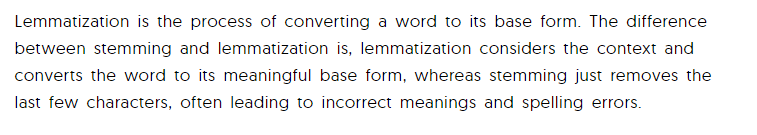
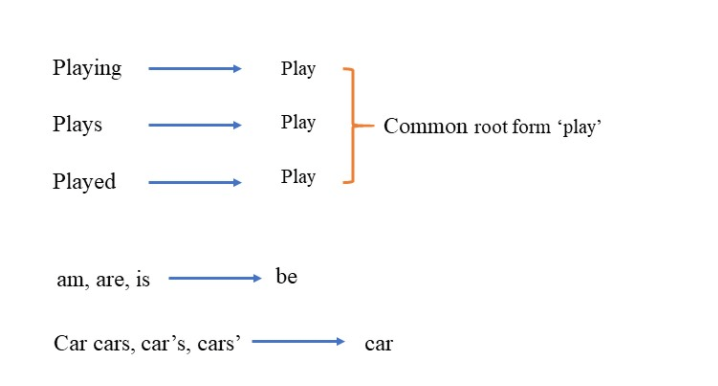

In [202]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos ="v") for t in word_tokenize(doc) if t.isalpha()]


In [203]:
# new_dset = ['My cars are beautiful', "playing", "he plays football","she is student","was", "they are students","connect", "connection",'retrieval', 'retrieved', 'retrieves']
vect = CountVectorizer(tokenizer=LemmaTokenizer())
vect.fit_transform(new_dset)
vect.get_feature_names()


['be',
 'beautiful',
 'cars',
 'connect',
 'connection',
 'football',
 'he',
 'my',
 'play',
 'retrieval',
 'retrieve',
 'she',
 'student',
 'students',
 'they']

In [204]:
vec = CountVectorizer()
a = vec.fit_transform(new_dset)
vec.get_feature_names()
print(a.shape)

(11, 19)


In [205]:
from nltk.corpus import wordnet

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# 2. Lemmatize Single Word with the appropriate POS tag
word = 'feet'
print(lemmatizer.lemmatize(word, get_wordnet_pos(word)))

# 3. Lemmatize a Sentence with the appropriate POS tag
sentence = "The striped bats are hanging on their feet for best"
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])


foot
['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best']


In [206]:
class New_LemmaTokenizer:
     def __init__(self):
       self.wnl = WordNetLemmatizer()
     def __call__(self, doc):
       return [self.wnl.lemmatize(t,pos =get_wordnet_pos(t)) for t in word_tokenize(doc) if t.isalpha()]

In [207]:
new_dset = ['My cars are beautiful', "playing", "he plays football","she is student","was", "they are students","connect", "connection","The striped bats are hanging on their feet for best"]
vect = CountVectorizer(tokenizer=New_LemmaTokenizer())
a = vect.fit_transform(new_dset)
vect.get_feature_names()
print(a.shape)

(9, 21)
